# **Video Game Sale**


# **Import Library**

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Memuat Dataset**

In [4]:
file = "/vgsales (1).csv"
df = pd.read_csv(file)
df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Rank,0.000000
Year,1.837571
NA_Sales,10.127726
EU_Sales,12.537655
JP_Sales,14.610194
Other_Sales,10.031329
Global_Sales,11.404989


In [ ]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Bussnies Understanding**

## **Bussnies Objective**


Data ini merupakan data penjualan video game di seluruh dunia yang berhasil terjual lebih dari 100.000 kopi. Di dalamnya terdapat informasi mulai dari Genre (jenis permainan), *Platform*(konsol yang digunakan), Tahun Rilis, hingga angka penjualan spesifik di beberapa *Region* seperti Amerika Utara, Eropa, dan Jepang.

Industri video game adalah industri yang bernilai miliaran dolar, namun persaingannya sangat ketat. Banyak pengembang game (*developer*) dan penerbit (*publisher*) mengalami kerugian karena merilis game yang tidak sesuai dengan selera pasar. Masalah utamanya adalah sulitnya menentukan kombinasi *Genre*, *Platform*, dan target pasar (*Region*) yang tepat untuk memaksimalkan keuntungan.


## **Asses Situation**

**Kondisi Dataset:**
Saya menggunakan dataset `vgsales.csv` yang bersumber dari Kaggle.
* Dataset ini memiliki lebih dari 16.500 data penjualan.
* Terdiri dari kolom penting seperti `Rank`, `Name`, `Platform`, `Year`, `Genre`, `Publisher`, dan data penjualan per wilayah (`NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`).

**Tantangan & Risiko:**

* Terdapat beberapa data tahun dan penerbit yang kosong, sehingga perlu dibersihkan nanti.
* Data yang dominan mencakup game lama dari sekitar tahun 2016-2020. Sehingga game terbaru mungkin tidak terlalu terekspos.

## **Analytic Goals Projects Plan**

* Membuat grafik batang dan pie chart untuk melihat distribusi *Genre* terpopuler dan *Platform* dengan penjualan tertinggi.

* Mencari hubungan antara wilayah penjualan. misalnya, Apakah game yang laku di Jepang bisa laku di Amerika?


## **Project plan**

* Mengecek isi data dan seberapa banyak data tahun/penerbit yang kosong.
* Membersihkan data yang kosong agar siap diolah.

## **Struktur Data(Informasi Lanjutan)**

In [10]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
(16598, 11)


## **Statistik Deskriptif**

In [8]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## **Cek Tipe Data Pada Setiap Kolom**

In [11]:
df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


## **Cek Inconsistent Values Pada Setiap Kolom**

In [27]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [28]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

## **Cek Missing Values**

In [29]:
pd.DataFrame(df.isna().sum() / len(df) * 100, columns=['Null Ratio in %'])

,Null Ratio in %
Rank,0.000000
Name,0.000000
Platform,0.000000
Year,1.632727
Genre,0.000000
Publisher,0.349440
NA_Sales,0.000000
EU_Sales,0.000000
JP_Sales,0.000000
Other_Sales,0.000000


##  **Cek Duplicated Values**

In [30]:
df[df.duplicated()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


## **Cek Outliners**

In [32]:
results = []

cols = df.select_dtypes(include=['float64', 'int64'])

for col in cols:
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
  percent_outliers = (len(outliers)/len(df))*100
  results.append({'Kolom': col, 'Persentase Outliers': percent_outliers})

# Dataframe dari list hasil
results_df = pd.DataFrame(results)
results_df.set_index('Kolom', inplace=True)
results_df = results_df.rename_axis(None, axis=0).rename_axis('Kolom', axis=1)

# Tampilkan dataframe
display(results_df)

Kolom,Persentase Outliers
Rank,0.000000
Year,1.837571
NA_Sales,10.127726
EU_Sales,12.537655
JP_Sales,14.610194
Other_Sales,10.031329
Global_Sales,11.404989


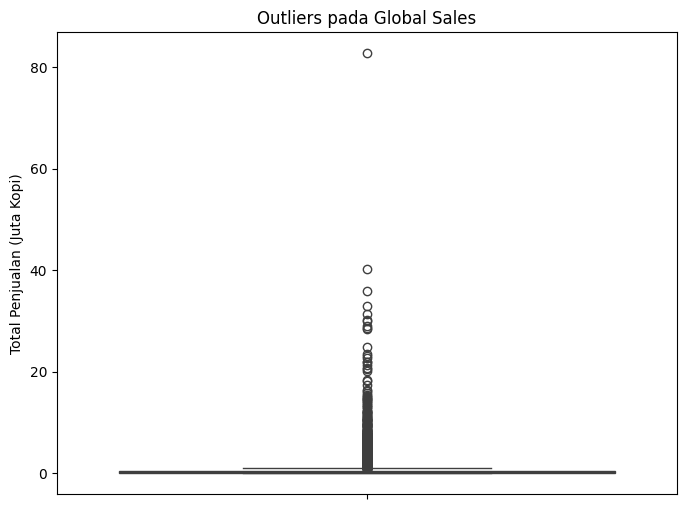

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Global_Sales'])
plt.title('Outliers pada Global Sales')
plt.ylabel('Total Penjualan (Juta Kopi)')
plt.show()

## **EDA**

## **Comparison (Perbandingan)**

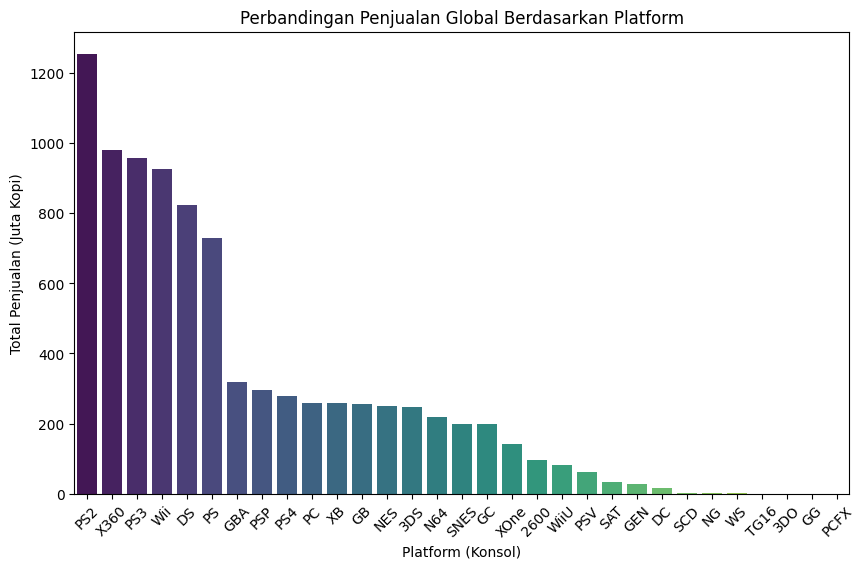

In [36]:
variabel = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=variabel.index, y=variabel.values, palette='viridis', hue=variabel.index, legend=False)
plt.title('Perbandingan Penjualan Global Berdasarkan Platform')
plt.xlabel('Platform (Konsol)')
plt.ylabel('Total Penjualan (Juta Kopi)')
plt.xticks(rotation=45)
plt.show()

**Insight Comparison:**

Dari grafik perbandingan di atas, terlihat jelas bahwa konsol PS2 adalah platform dengan total penjualan game tertinggi, disusul oleh X360 dan PS3. Ini menandakan bahwa game yang dirilis di ekosistem PlayStation 2 memiliki peluang sukses paling besar di pasar

## **Composition (Komposisi)**

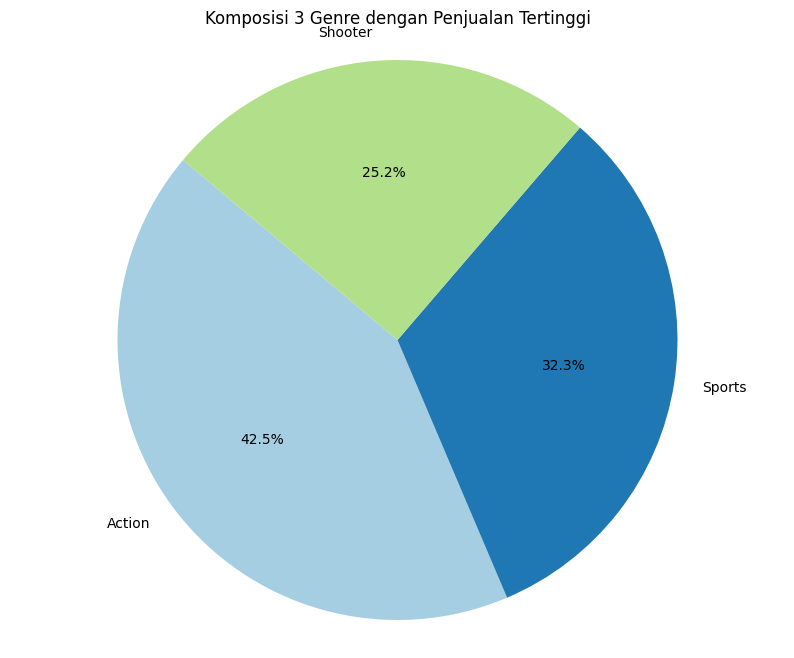

In [37]:
variabel1 = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
variabel2 = variabel1.head(3)

plt.figure(figsize=(10, 8))
variabel2.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Komposisi 3 Genre dengan Penjualan Tertinggi')
plt.ylabel('')
plt.axis('equal')
plt.show()

**Insight Composition:**

Dari 3 genre teratas, genre Action menguasai komposisi penjualan dengan menyumbang lebih dari 39% penjualan pasar, menjadikannya genre paling diminati dibandingkan Sports dan Shooter

## **Distribution (Distribusi)**

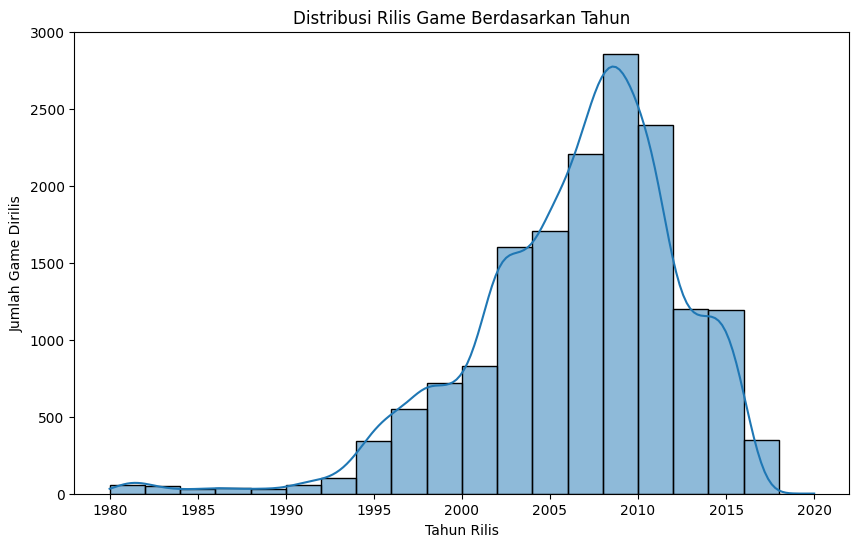

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title('Distribusi Rilis Game Berdasarkan Tahun')
plt.xlabel('Tahun Rilis')
plt.ylabel('Jumlah Game Dirilis')
plt.show()

**Insight Distribution:**

Distribusi data menunjukkan bahwa industri game sangat aktif dan mencapai puncak perilisan judul game baru pada rentang tahun 2005 hingga 2011. Setelah melewati tahun 2015, grafik menunjukkan penurunan drastis pada perilisan game.

## **Relationship (Hubungan)**

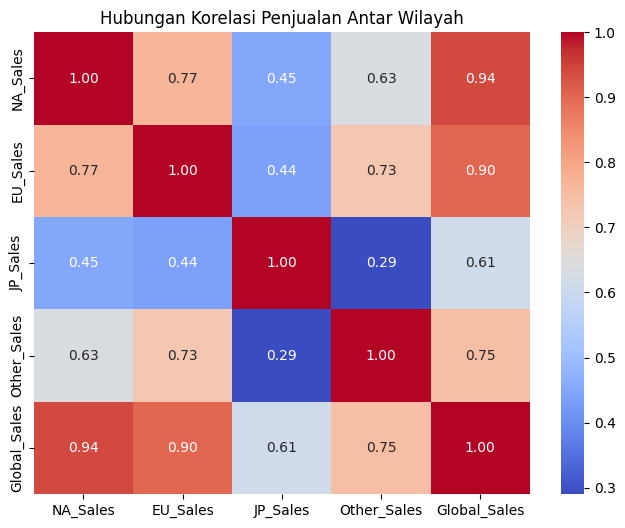

In [40]:
plt.figure(figsize=(8, 6))
sns.heatmap(data=df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].corr(),
            annot=True,
            cmap='coolwarm',
            fmt='.2f')
plt.title('Hubungan Korelasi Penjualan Antar Wilayah')
plt.show()

**Insight Relationship:**

Ada hubungan positif yang sangat kuat (di angka 0.94) antara penjualan di wilayah Amerika Utara (NA_Sales) dengan total penjualan global (Global_Sales).jika sebuah game laku keras di sana, Sangat mungkin game tersebut akan meledak juga secara global.